##  Author : Riasad Alvi
### 22 Jan 2025

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats
!chmod 600 /root/.kaggle/kaggle.json

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 218MB/s]
100% 1.06G/1.06G [00:04<00:00, 275MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg19 import VGG19

In [9]:
conv_base = VGG19(
    weights='imagenet',  # Load pre-trained weights from the ImageNet dataset
    include_top=False,   # Exclude the fully connected (dense) layers (we only need the convolutional base)
    input_shape=(224, 224, 3)  # Specify the input shape for the images (224x224 RGB images)
)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model = Sequential()
# Create a Sequential model, which allows stacking layers in a linear order.

model.add(conv_base)
# Add the convolutional base (VGG19) as the first layer, using pre-trained weights. It extracts features from input images.

model.add(Flatten())
# Flatten the 3D feature maps from the convolutional layers into a 1D vector. This prepares the data for the Dense layers.

model.add(Dense(256, activation='relu'))
# Add a fully connected (Dense) layer with 256 neurons and ReLU activation. This layer learns high-level patterns from the features.

model.add(Dense(1, activation='sigmoid'))
# Add the output layer with 1 neuron and sigmoid activation. It outputs a probability for binary classification (e.g., 0 or 1).


In [11]:
conv_base.trainable = False
# Freeze the convolutional base (VGG19) to prevent its weights from being updated during training.
# This ensures that the pre-trained feature extraction layers retain their learned representations.


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# Import utilities from Keras for image preprocessing, using tensorflow.keras instead of just keras:
# - ImageDataGenerator: Used for real-time data augmentation.
# - array_to_img: Converts a NumPy array into an image object.
# - img_to_array: Converts an image object into a NumPy array.
# - load_img: Loads an image as a PIL object for further processing.

# Applying Data Augmentation for reducing Overfitting

In [21]:
batch_size = 32  # Set the batch size for training and validation.

# Define the data augmentation and preprocessing for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Rescale image pixel values to the range [0, 1] by dividing by 255.
    shear_range=0.2,          # Apply random shear transformations to images.
    zoom_range=0.2,           # Apply random zoom to images for data augmentation.
    horizontal_flip=True      # Randomly flip images horizontally for augmentation.
)

# Define only rescaling for the test images
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the test images (no augmentation).

# Create a generator for the training data from the 'train' directory
train_generator = train_datagen.flow_from_directory(
    '/content/train',             # Path to the training images directory.
    target_size=(224, 224),       # Resize all images to 224x224 pixels.
    batch_size=batch_size,        # Set the batch size to 32.
    class_mode='binary'           # Set class mode to binary since it's a binary classification task.
)

# Create a generator for the validation data from the 'test' directory
validation_generator = test_datagen.flow_from_directory(
    '/content/test',              # Path to the validation (test) images directory.
    target_size=(224,224),       # Resize all images to 224x224 pixels.
    batch_size=batch_size,        # Set the batch size to 32.
    class_mode='binary'           # Set class mode to binary for binary classification.
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.



### **Purpose and Significance**:
- **Purpose**: Sets up data generators to feed images into the model during training and validation, including data augmentation for the training set.
- **Significance**:
  - **Data Augmentation** (train_datagen): Increases the diversity of the training dataset by applying random transformations (shear, zoom, horizontal flip), helping the model generalize better.
  - **Rescaling**: Ensures that pixel values are within a standard range [0, 1], making training more stable.
  - **Batch Processing**: Loads images in batches of a specified size (32 in this case) to efficiently train the model.
  - **Binary Classification**: The `class_mode='binary'` setting indicates that the task involves two classes (binary classification).

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


### **Purpose and Significance**:
- **Purpose**: Prepares the model for training by specifying how it should update weights (`optimizer`), how to measure prediction error (`loss`), and how to evaluate performance (`metrics`).
- **Significance**:
  - **Adam Optimizer**: A popular optimization algorithm that adapts the learning rate and is computationally efficient, especially for large datasets and deep learning models.
  - **Binary Cross-Entropy Loss**: Suitable for binary classification problems. It measures the difference between the predicted probabilities and the actual labels.
  - **Accuracy Metric**: Measures the percentage of correct predictions, providing an intuitive evaluation of the model’s performance during training.

In [24]:
# Train the model using a generator for training data
history = model.fit(
        train_generator,               # Train the model using the training data generator
        epochs=10,                     # Train for 10 epochs
        validation_data=validation_generator) # Use validation data generator for model evaluation during training

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 479ms/step - accuracy: 0.8125 - loss: 0.5896 - val_accuracy: 0.9138 - val_loss: 0.1965
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 290s 461ms/step - accuracy: 0.9029 - loss: 0.2250 - val_accuracy: 0.9314 - val_loss: 0.1695
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 463ms/step - accuracy: 0.9175 - loss: 0.1973 - val_accuracy: 0.9214 - val_loss: 0.1750
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 288s 455ms/step - accuracy: 0.9218 - loss: 0.1878 - val_accuracy: 0.9260 - val_loss: 0.1726
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 292s 463ms/step - accuracy: 0.9236 - loss: 0.1776 - val_accuracy: 0.9238 - val_loss: 0.1807
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 304s 483ms/step - accuracy: 0.9292 - loss: 0.1716 - val_accuracy: 0.9300 - val_loss: 0.1692
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 287s 455ms/step - accuracy: 0.9313 - loss: 0.1647 - val_accuracy: 0.9266 - val_loss: 0.1746
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 286s 455ms/step - accuracy: 0.9345 - loss: 0.16


### **Purpose and Significance**:
- **Purpose**: Fits the model to the training data and validates it using the validation data generator. The model will train for a specified number of epochs.
- **Significance**:
  - **`fit_generator`**: Used when the dataset is too large to fit into memory at once. It loads data in batches from the generator.
  - **`epochs`**: Defines how many times the model will iterate over the entire training dataset.
  - **`validation_data`**: Provides data for model evaluation at the end of each epoch, helping monitor performance on unseen data.

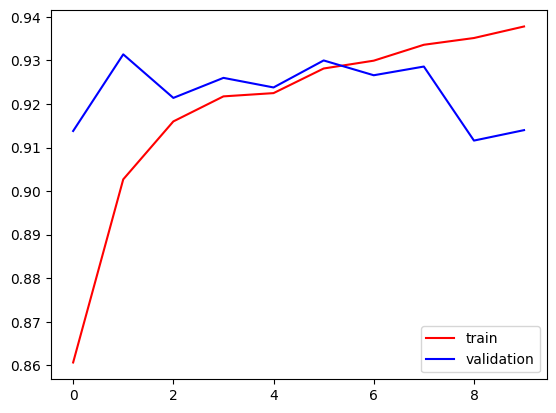

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

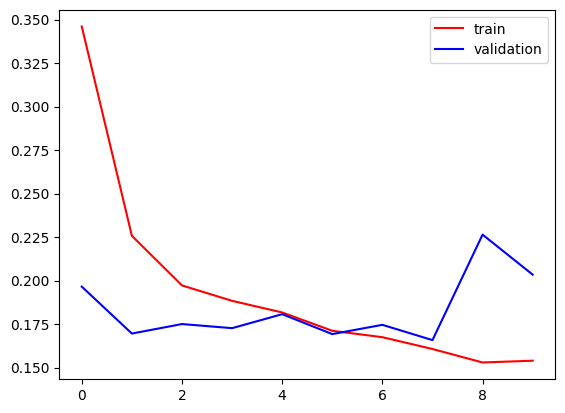

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()